# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        city_loop = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(city_loop['clouds']['all'])
        countries.append(city_loop['sys']['country'])
        dates.append(city_loop['dt'])
        humidities.append(city_loop['main']['humidity'])
        lats.append(city_loop['coord']['lat'])
        lngs.append(city_loop['coord']['lon'])
        max_temps.append(city_loop['main']['temp_max'])
        wind_speeds.append(city_loop['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

City not found. Skipping...
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bahia de caraquez
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | luanda
Processing Record 7 of Set 1 | shenzhen
Processing Record 8 of Set 1 | hovd
City not found. Skipping...
Processing Record 9 of Set 1 | paraiso
Processing Record 10 of Set 1 | jiangyou
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | beyneu
Processing Record 13 of Set 1 | aviles
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | trindade
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | tabas
Processing Record 18 of Set 1 | amahai
Processing Record 19 of Set 1 | del rio
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | nouadhibou
Processing Record 23 of Set 1 | coquimbo
Processing Record 24 of 

Processing Record 42 of Set 4 | kutum
Processing Record 43 of Set 4 | gatton
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | golden
City not found. Skipping...
Processing Record 46 of Set 4 | comodoro rivadavia
Processing Record 47 of Set 4 | palmer
Processing Record 48 of Set 4 | manadhoo
Processing Record 49 of Set 4 | bandiagara
Processing Record 1 of Set 5 | batagay
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | chabahar
Processing Record 4 of Set 5 | mogadishu
Processing Record 5 of Set 5 | sibolga
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | woodward
Processing Record 8 of Set 5 | ahipara
City not found. Skipping...
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 5 | olinda
City not found. Skipping...
Processing Record 12 of Set 5 | kamaishi
Processing Record 13 of Set 5 | victoria
Processing Record 14 of Set 5 | bandarbeyla
Processing Record 

Processing Record 35 of Set 8 | new braunfels
Processing Record 36 of Set 8 | kungurtug
Processing Record 37 of Set 8 | alexandria
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | kathu
Processing Record 40 of Set 8 | samarai
Processing Record 41 of Set 8 | araguacu
Processing Record 42 of Set 8 | ramachandrapuram
City not found. Skipping...
Processing Record 43 of Set 8 | sun valley
Processing Record 44 of Set 8 | teya
Processing Record 45 of Set 8 | caravelas
City not found. Skipping...
Processing Record 46 of Set 8 | tautira
Processing Record 47 of Set 8 | nago
City not found. Skipping...
Processing Record 48 of Set 8 | muros
City not found. Skipping...
Processing Record 49 of Set 8 | omboue
Processing Record 1 of Set 9 | laela
Processing Record 2 of Set 9 | fort-shevchenko
Processing Record 3 of Set 9 | san julian
City not found. Skipping...
Processing Record 4 of Set 9 | nicoya
Processing Record 5 of Set 9 | khandbari
Processing Record 6 of Set 9 | dunmore to

City not found. Skipping...
Processing Record 18 of Set 12 | najran
Processing Record 19 of Set 12 | derzhavinsk
Processing Record 20 of Set 12 | hangu
Processing Record 21 of Set 12 | carauari
Processing Record 22 of Set 12 | rietavas
Processing Record 23 of Set 12 | bemidji
Processing Record 24 of Set 12 | rossland
Processing Record 25 of Set 12 | raga
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | dire dawa
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary to establish a dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [5]:
# Create the dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1650825103,87,-23.1203,-134.9692,73.20,12.37
1,bahia de caraquez,10,BR,1650825271,41,-12.0000,-42.0000,83.23,11.61
2,rocha,0,UY,1650824966,30,-34.4833,-54.3333,77.70,14.47
3,ushuaia,75,AR,1650825096,70,-54.8000,-68.3000,44.26,6.91
4,hasaki,6,JP,1650825181,90,35.7333,140.8333,57.60,3.83


In [7]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [8]:
# make sure there are no holes in the data
weather_dataframe.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [12]:
# Another way to take a look at the data as a whole
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,59.333922,1.650825e+09,69.833922,23.491239,20.973507,61.063463,8.046378
std,40.566866,1.263740e+02,23.629829,31.763018,86.390453,23.187713,5.675674
min,0.000000,1.650825e+09,7.000000,-54.800000,-179.166700,-14.690000,0.000000
25%,17.250000,1.650825e+09,57.000000,-1.284225,-50.157175,47.225000,3.965000
50%,75.000000,1.650825e+09,77.000000,30.439700,24.547900,64.780000,6.510000
75%,100.000000,1.650825e+09,88.000000,49.170775,89.736275,78.757500,11.405000
max,100.000000,1.650825e+09,100.000000,78.218600,179.316700,102.720000,38.700000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# nothing over >100% humidity 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

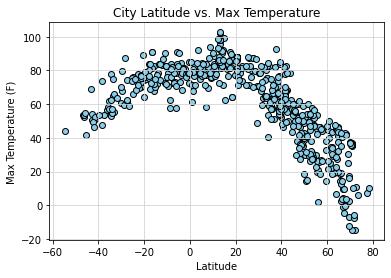

In [123]:
# Latitude vs Temperature Plot
# how the scatter plot looks
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
# title
plt.title("City Latitude vs. Max Temperature")
# x-axis
plt.xlabel("Latitude")
# y-axis
plt.ylabel("Max Temperature (F)")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
plt.savefig("./figures/lat_vs_temp.png", bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

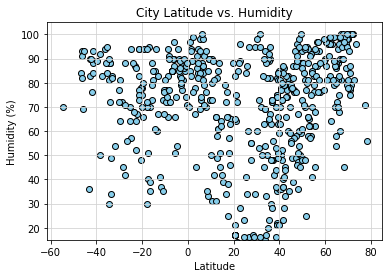

In [138]:
# Latitude vs Humidity Plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_humidity.png", bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

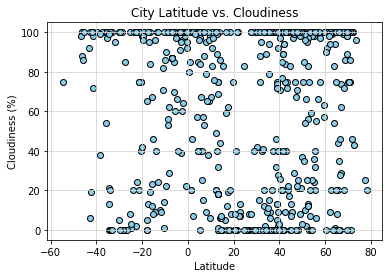

In [125]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_cloud.png", bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

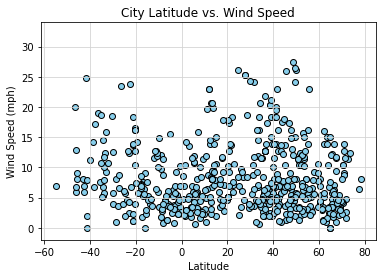

In [126]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_wind_speed.png", bbox_inches='tight')
plt.show()

## Linear Regression

In [127]:
# Create a function to create Linear Regression plots

# x_values: first variable
# y_values: second variable
# regEQplotX: control the location where the linear regression equasion appears on the plot x line
# regEQplotY: control the location where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()

In [128]:
# Create Northern and Southern Hemisphere DataFrames
# pull loc above and below the equator; cities directly on the equator are excluded
Northern_DF = weather_dataframe.loc[weather_dataframe['Lat'] > 0]
Southern_DF = weather_dataframe.loc[weather_dataframe['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8535979750531035
y = -1.05x + 98.13


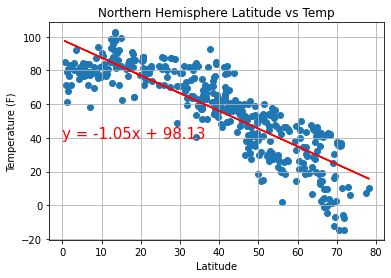

In [129]:
#set the data sets to compare
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Max Temp"]
#move the equations to where it can be seen
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#title
plt.title(f'Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# NHL=Northern Hemisphere Latitiude
plt.savefig("./figures/NHL_vs_temp.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7379846280551676
y = 0.61x + 83.41


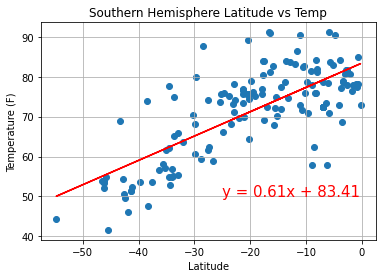

In [130]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Max Temp"]
regEQplotX = -25
regEQplotY = 50
y_label = "Temperature (F)"
plt.title(f"Southern Hemisphere Latitude vs Temp")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


# SHL= Southern Hemishere Latitude
plt.savefig("./figures/SHL_vs_temp.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.3161359877747031
y = 0.39x + 52.49


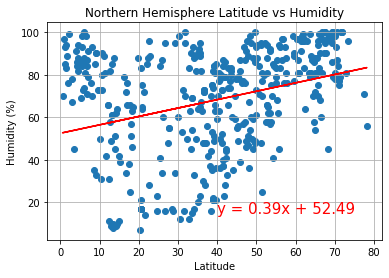

In [131]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Humidity"]
regEQplotX = 40
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f"Northern Hemisphere Latitude vs Humidity")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_humidity_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.04827676914076291
y = 0.06x + 76.93


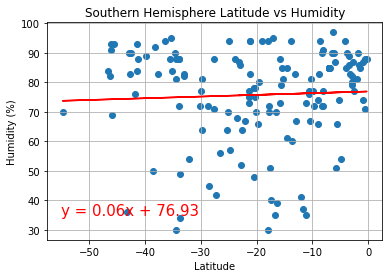

In [132]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f"Southern Hemisphere Latitude vs Humidity")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_humidity_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.1616655167700471
y = 0.33x + 43.97


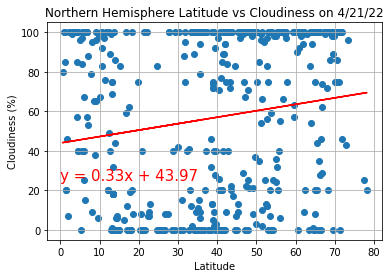

In [133]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f"Northern Hemisphere Latitude vs Cloudiness on 4/21/22")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_cloudiness_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.0918817101365821
y = 0.26x + 72.33


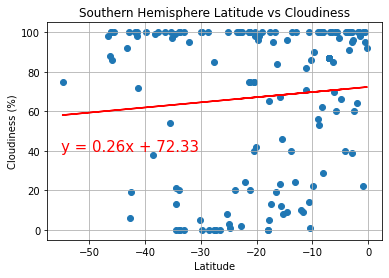

In [134]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 40
y_label = "Cloudiness (%)"
plt.title(f"Southern Hemisphere Latitude vs Cloudiness")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_cloudiness_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.07149561888233592
y = -0.02x + 8.89


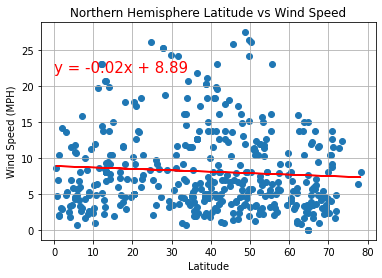

In [135]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 0
regEQplotY = 22
y_label = "Wind Speed (MPH)"
plt.title(f"Northern Hemisphere Latitude vs Wind Speed")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_WindSpeed_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.07149561888233592
y = -0.02x + 8.89


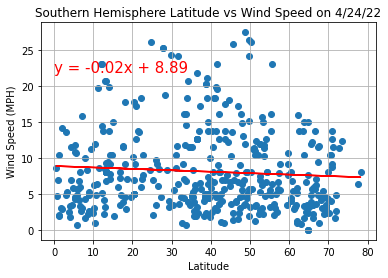

In [136]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 0
regEQplotY = 22
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on 4/24/22')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_WindSpeed_vs_lat_regress.png", bbox_inches='tight')
plt.show()